In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from unicodedata import category
from pandas.core.reshape.tile import Categorical
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [100]:
data=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data_Train.xlsx")

In [101]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [102]:
for i in data:
  print(i, data[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR

In [103]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')

In [104]:
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [105]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

In [106]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [107]:
data.Route=data.Route.str.split('→')
data.Route

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10683, dtype: object

In [108]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [109]:
data.Dep_Time=data.Dep_Time.str.split(':')

In [110]:
data['Dep_Time_Hours']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

In [111]:
data.Arrival_Time=data.Arrival_Time.str.split(' ')

In [112]:
data['Arrival_Date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [113]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')

In [114]:
data['Arrival_Time_Hours']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [115]:
data['Travel_Hours']=data.Duration.str[0]

In [116]:
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]

In [117]:
data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

In [118]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [119]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [120]:
data.Additional_Info.replace('No Info','No Info',inplace=True)

In [121]:
data.isnull().sum()

Airline                   0
Date_of_Journey           0
Source                    0
Destination               0
Route                     1
Dep_Time                  0
Arrival_Time              0
Duration                  0
Total_Stops               1
Additional_Info           0
Price                     0
Date                      0
Month                     0
Year                      0
City1                     1
City2                     1
City3                  3492
City4                  9117
City5                 10637
City6                 10682
Dep_Time_Hours            0
Dep_Time_Mins             0
Arrival_Date           6348
Time_of_Arrival           0
Arrival_Time_Hours        0
Arrival_Time_Mins         0
Travel_Hours              0
Travel_Mins               0
dtype: int64

In [122]:
data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [123]:
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1, inplace=True)
data.drop(['Time_of_Arrival'],axis=1,inplace=True)

In [124]:
data.isnull().sum()

Airline                  0
Source                   0
Destination              0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                    1
City3                 3492
Dep_Time_Hours           0
Dep_Time_Mins            0
Arrival_Date          6348
Arrival_Time_Hours       0
Arrival_Time_Mins        0
Travel_Hours             0
Travel_Mins              0
dtype: int64

In [125]:
data['Total_Stops'].fillna('non-stop',inplace=True)

In [126]:
data['City1'].fillna('None',inplace=True)

In [127]:
data['City2'].fillna('None',inplace=True)

In [128]:
data['City3'].fillna('None',inplace=True)

In [129]:
data['Arrival_Date'].fillna(data['Date'],inplace=True)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10683 non-null  object
 1   Source              10683 non-null  object
 2   Destination         10683 non-null  object
 3   Total_Stops         10683 non-null  object
 4   Additional_Info     10683 non-null  object
 5   Price               10683 non-null  int64 
 6   Date                10683 non-null  object
 7   Month               10683 non-null  object
 8   Year                10683 non-null  object
 9   City1               10683 non-null  object
 10  City2               10683 non-null  object
 11  City3               10683 non-null  object
 12  Dep_Time_Hours      10683 non-null  object
 13  Dep_Time_Mins       10683 non-null  object
 14  Arrival_Date        10683 non-null  object
 15  Arrival_Time_Hours  10683 non-null  object
 16  Arrival_Time_Mins   10

In [131]:
#data.Total_Stops=data.Total_Stops.astype('int64')
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hours=data.Dep_Time_Hours.astype('int64')
dataDep_Time_Hours=data.Dep_Time_Hours.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_Date=data.Arrival_Date.astype('int64')
data.Arrival_Time_Hours=data.Arrival_Time_Hours.astype('int64') 
data.Arrival_Time_Mins=data.Arrival_Time_Mins.astype('int64')
data.Travel_Hours=data.Travel_Hours.astype('int64')
#data.Travel_Mins=data.Travel_Mins.astype('int64')

In [132]:
data[data['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hours,Dep_Time_Mins,Arrival_Date,Arrival_Time_Hours,Arrival_Time_Mins,Travel_Hours,Travel_Mins


In [133]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hours,Dep_Time_Mins,Arrival_Date,Arrival_Time_Hours,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,BLR,DEL,None,22,20,22,1,10,2,h
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,CCU,IXR,BBI,5,50,1,13,15,7,h
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,DEL,LKO,BOM,9,25,10,4,25,1,9
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,CCU,NAG,BLR,18,5,12,23,30,5,h
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,BLR,NAG,DEL,16,50,1,21,35,4,h


In [134]:
data.drop(index=6474,inplace=True,axis=0)

In [135]:
data.Travel_Hours=data.Travel_Hours.astype('int64')

In [136]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [137]:
data.Airline=le.fit_transform(data.Airline) 
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination) 
data.Total_Stops=le.fit_transform(data.Total_Stops) 
data.City1=le.fit_transform(data.City1)
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.Additional_Info=le.fit_transform(data.Additional_Info) 
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hours,Dep_Time_Mins,Arrival_Date,Arrival_Time_Hours,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,8,3897,24,3,2019,0,13,29,22,20,22,1,10,2,h
1,1,3,0,1,8,7662,1,5,2019,2,25,1,5,50,1,13,15,7,h
2,4,2,1,1,8,13882,9,6,2019,3,32,4,9,25,10,4,25,1,9
3,3,3,0,0,8,6218,12,5,2019,2,34,3,18,5,12,23,30,5,h
4,3,0,5,0,8,13302,1,3,2019,0,34,8,16,50,1,21,35,4,h


In [138]:
categorical=['Airline','Source','Destination','Additional_Info','City1']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hours','Dep_Time_Mins','Arrival_Date','Arrival_Time_Hours','Arrival_Time_Mins','Travel_Hours','Travel_Mins']

In [139]:
data=data[['Airline','Source','Destination','Additional_Info','City1','Date','Month','Year','Dep_Time_Hours','Dep_Time_Mins','Arrival_Date','Arrival_Time_Hours','Arrival_Time_Mins','Price']]

In [140]:
data.head()

,Airline,Source,Destination,Additional_Info,City1,Date,Month,Year,Dep_Time_Hours,Dep_Time_Mins,Arrival_Date,Arrival_Time_Hours,Arrival_Time_Mins,Price
0,3,0,5,8,0,24,3,2019,22,20,22,1,10,3897
1,1,3,0,8,2,1,5,2019,5,50,1,13,15,7662
2,4,2,1,8,3,9,6,2019,9,25,10,4,25,13882
3,3,3,0,8,2,12,5,2019,18,5,12,23,30,6218
4,3,0,5,8,0,1,3,2019,16,50,1,21,35,13302


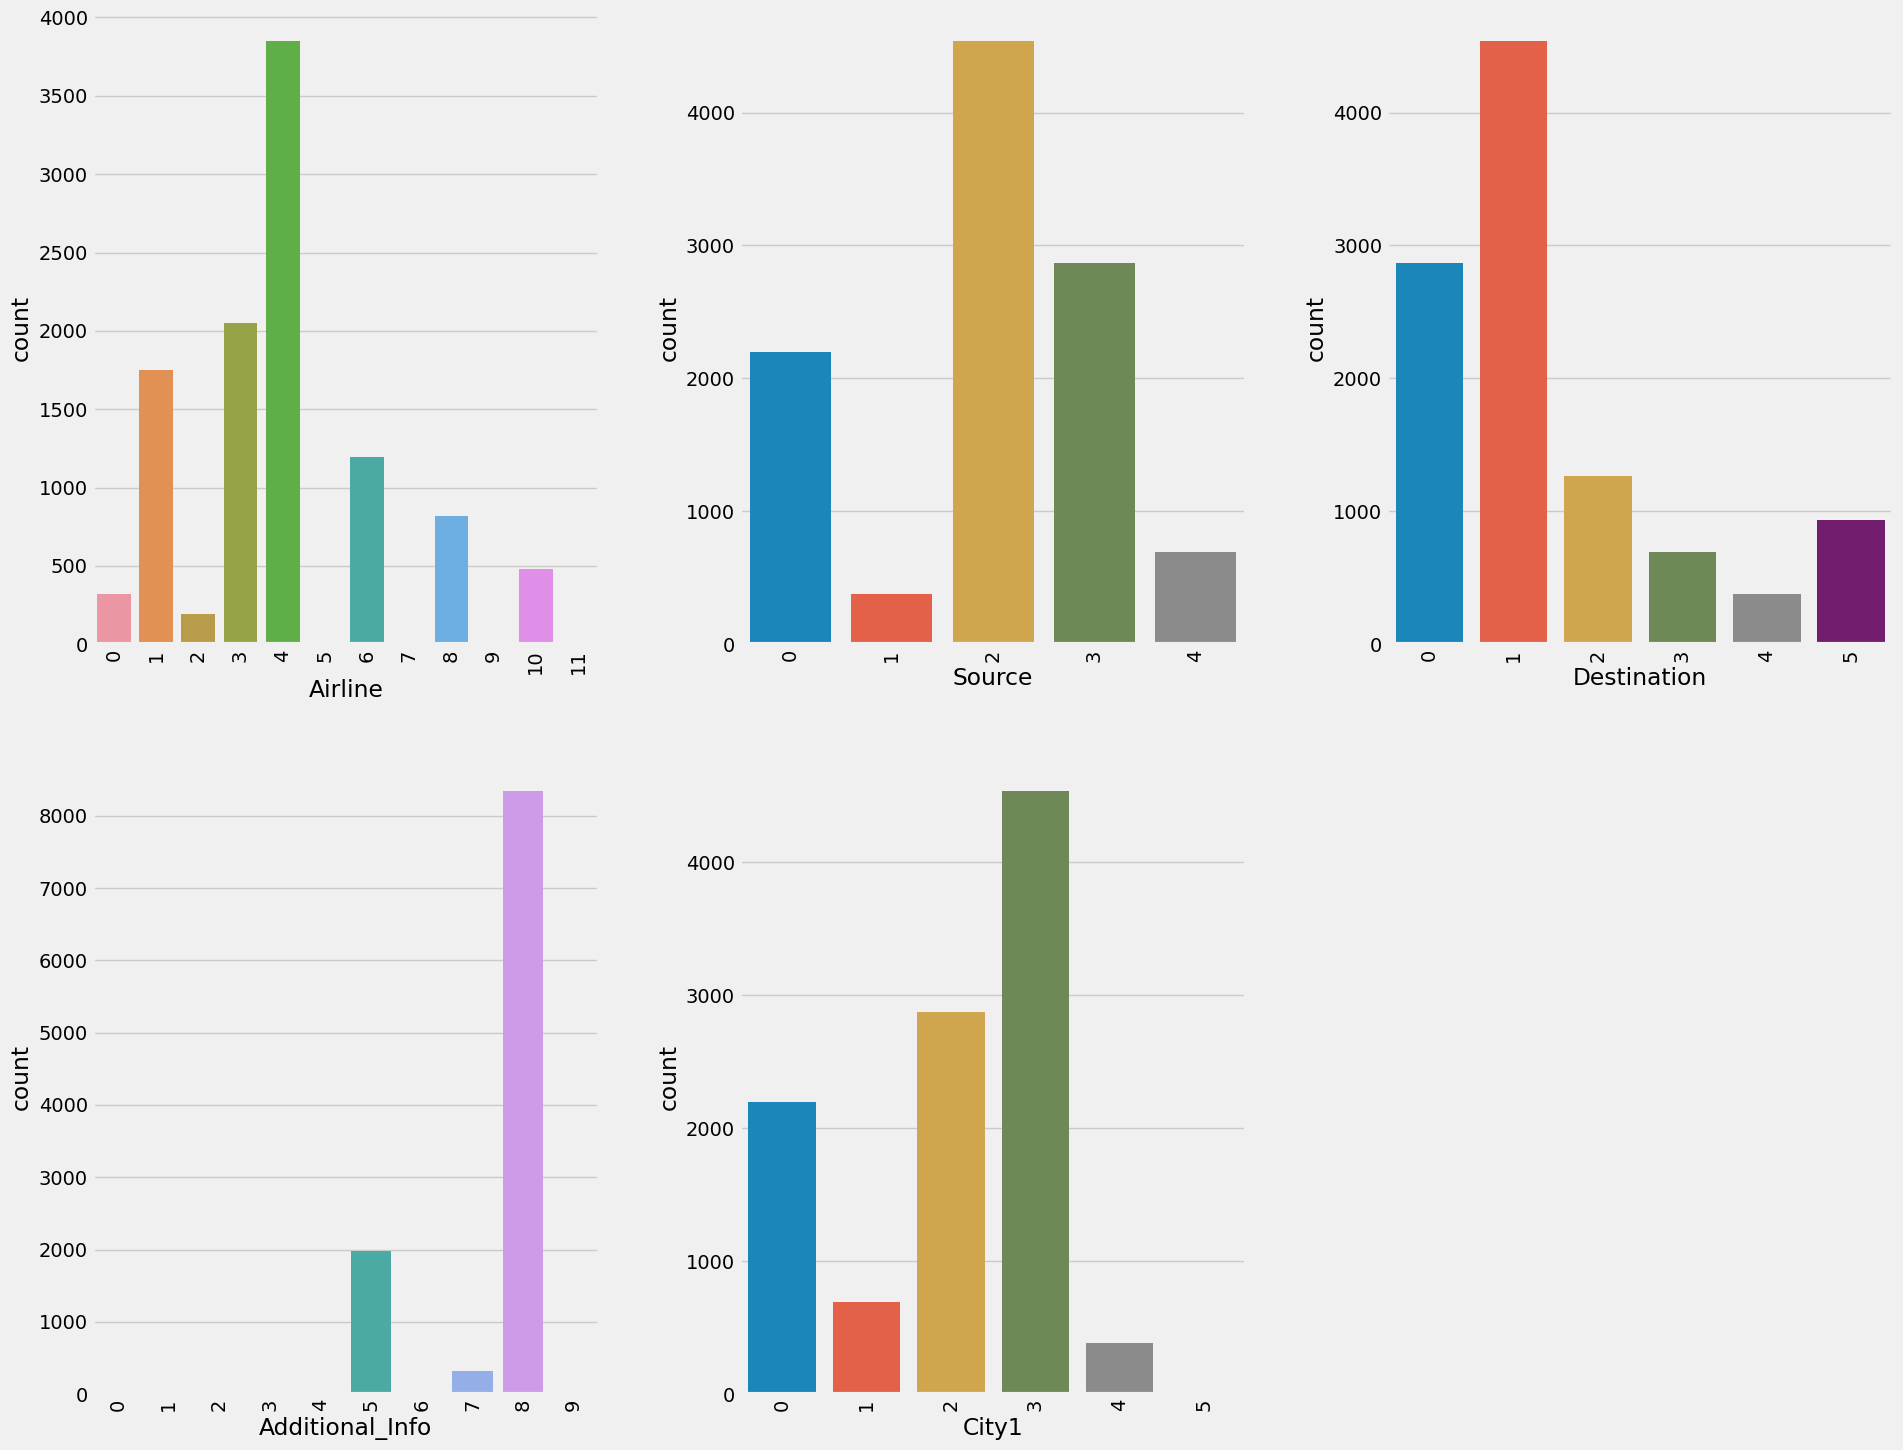

In [141]:
import seaborn as sns
c=1
plt.figure(figsize=(20,45))
for i in categorical:
  plt.subplot(6,3,c)
  sns.countplot(x=data[i])
  plt.xticks(rotation=90)
  plt.tight_layout(pad=3.0)
  c=c+1

plt.show()  

<Axes: xlabel='Price', ylabel='Density'>

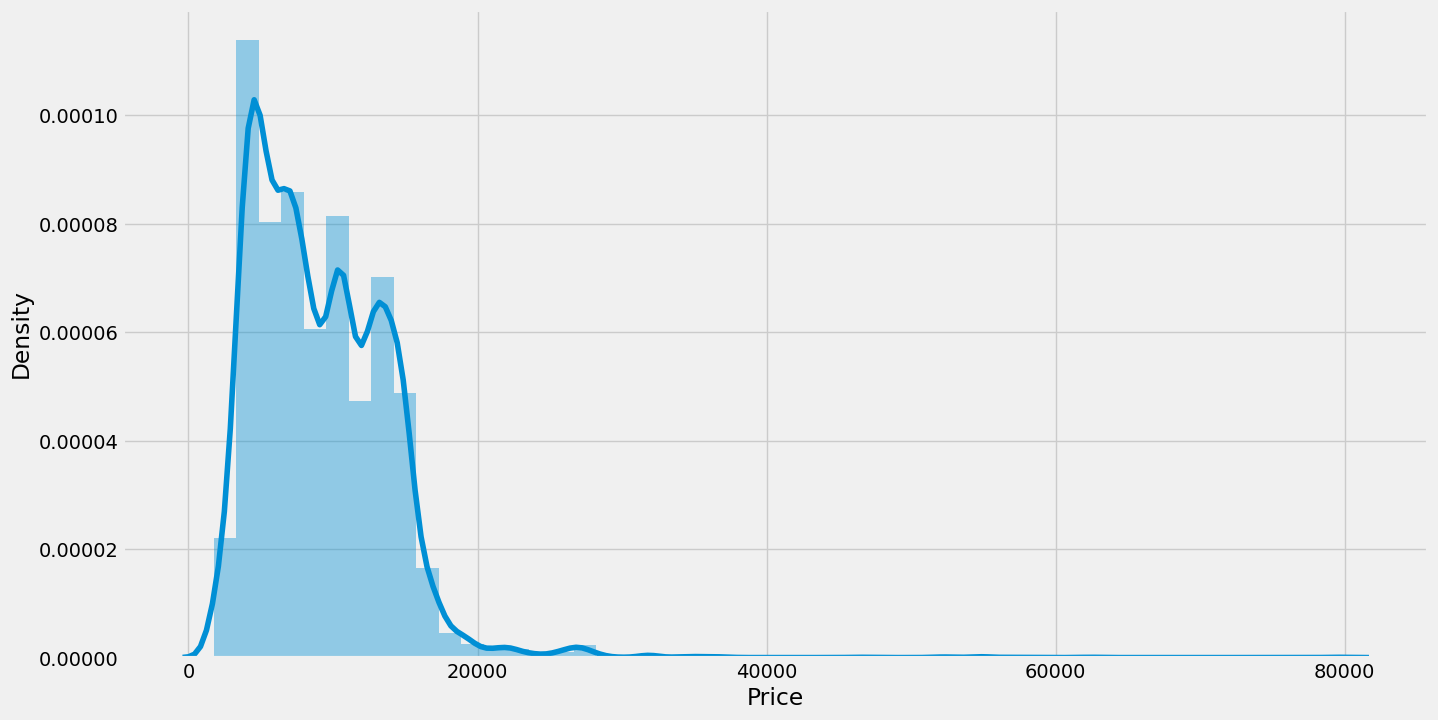

In [142]:
plt.figure(figsize=(15,8))
sns.distplot(data.Price)

In [143]:
data=data[['Airline','Source','Destination','Date','Month','Year','Dep_Time_Hours','Dep_Time_Mins','Arrival_Date','Arrival_Time_Hours','Arrival_Time_Mins','Price']]

<Axes: >

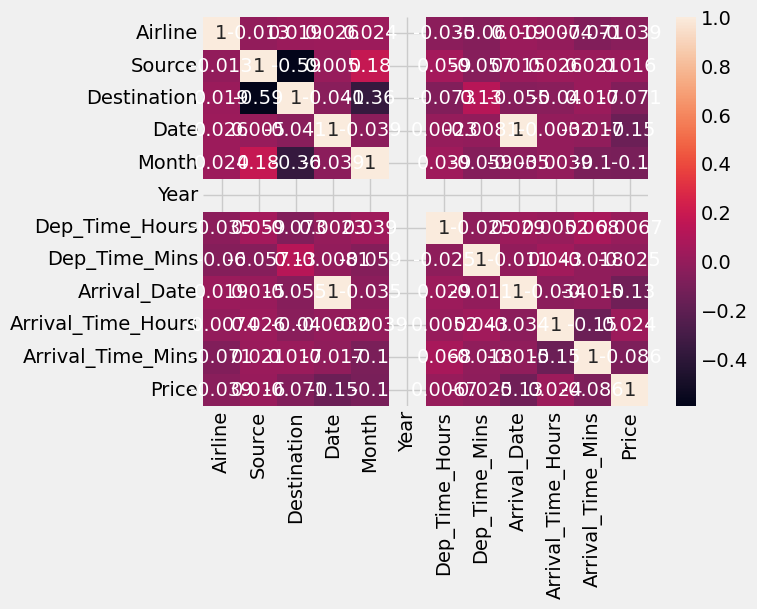

In [144]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='Price'>

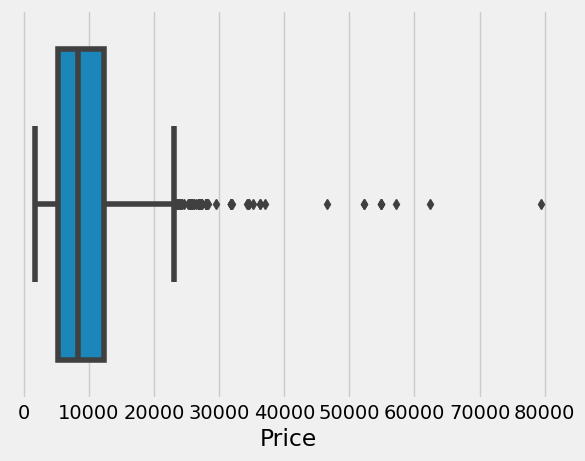

In [145]:
import seaborn as sns
sns.boxplot(x=data['Price'])

In [146]:
y = data['Price']
x = data.drop(columns=['Price'],axis=1)

In [147]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [148]:
x_scaled = ss.fit_transform(x)

In [149]:
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hours,Dep_Time_Mins,Arrival_Date,Arrival_Time_Hours,Arrival_Time_Mins
0,-0.410805,-1.658435,2.416778,1.237288,-1.467707,0.0,1.654268,-0.234932,0.955750,-1.800319,-0.889984
1,-1.261152,0.890299,-0.973732,-1.475307,0.250153,0.0,-1.303000,1.363674,-1.524648,-0.050813,-0.587017
2,0.014369,0.040721,-0.295630,-0.531796,1.109082,0.0,-0.607172,0.031502,-0.461621,-1.362943,0.018918
3,-0.410805,0.890299,-0.973732,-0.177979,0.250153,0.0,0.958440,-1.034235,-0.225392,1.407109,0.321885
4,-0.410805,-1.658435,2.416778,-1.475307,-1.467707,0.0,0.610527,1.363674,-1.524648,1.115525,0.624852


In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hours,Dep_Time_Mins,Arrival_Date,Arrival_Time_Hours,Arrival_Time_Mins
10005,6,2,1,27,5,2019,8,30,27,19,15
3684,4,2,1,9,5,2019,11,30,10,12,35
1034,8,2,1,24,4,2019,15,45,24,22,5
3909,6,2,1,21,3,2019,12,50,22,1,35
3088,1,2,1,24,6,2019,17,15,25,19,15


In [151]:
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [152]:
for i in [rfr,gb,ad]:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  test_score=r2_score(y_test,y_pred)
  train_score=r2_score(y_train,i.predict(x_train))
  if abs(train_score-test_score)<=0.2:
      print(i)
      print("R2 score is",r2_score(y_test,y_pred))
      print("R2 for train data",r2_score(y_train, i.predict(x_train)))
      print("Mean Absolute Error is",mean_absolute_error(y_pred,y_test))
      print("Mean Squared Error is",mean_squared_error(y_pred,y_test))
      print("Root Mean Sqaured Error is", (mean_squared_error(y_pred,y_test,squared=False)))

RandomForestRegressor()
R2 score is 0.8511067771692712
R2 for train data 0.9510257207619986
Mean Absolute Error is 1175.4677403426267
Mean Squared Error is 3147457.1032964815
Root Mean Sqaured Error is 1774.107410304258
GradientBoostingRegressor()
R2 score is 0.7652984210151784
R2 for train data 0.7338510043179753
Mean Absolute Error is 1682.572441052144
Mean Squared Error is 4961361.82618931
Root Mean Sqaured Error is 2227.4114631538805
AdaBoostRegressor()
R2 score is 0.36055895205384403
R2 for train data 0.35251564587595874
Mean Absolute Error is 3018.3064496898855
Mean Squared Error is 13517158.338264596
Root Mean Sqaured Error is 3676.5688268091208


In [153]:
knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor
for i in [knn,svr,dt]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print('R2 Score is',r2_score(y_test,y_pred))
        print('R2 Score for train data',r2_score(y_train, i.predict(x_train)))
        print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
        print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
        print('Root Mean Sqaured Error is',(mean_squared_error(y_test,y_pred,squared=False)))

SVR()
R2 Score is -0.030117446601644504
R2 Score for train data -0.023060876999700497
Mean Absolute Error is 3629.610207677262
Mean Squared Error is 21775675.29868014
Root Mean Sqaured Error is 4666.441395611879


TypeError: ignored

In [170]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor(max_features='sqrt', n_estimators=10) 0.7556417999419935
RandomForestRegressor(max_features='sqrt', n_estimators=10) 0.7609641066992561
RandomForestRegressor(max_features='sqrt', n_estimators=10) 0.7585339053211969


In [171]:
from sklearn.model_selection import RandomizedSearchCV

In [173]:
param_grid={'n_estinators':[10,30,50,70,100],'max_depth':[None,1,2,3],
            'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

#rf_res.fit(x_train,y_train)

In [175]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1 )
#gb_res.fit(x_train,y_train)

In [176]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))

train accuracy 0.9228576257441765
test accuracy 0.7657891223764051


In [191]:
Price_list=pd.DataFrame({'Price':Prices})

NameError: ignored

In [67]:
knn=KNeighborsRegressor(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=-1)
knn.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))

train accuracy 0.9236037453159117
test accuracy 0.7731463652352051


In [68]:
data.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hours,Dep_Time_Mins,Arrival_Date,Arrival_Time_Hours,Arrival_Time_Mins,Price
0,3,0,5,24,3,2019,22,20,22,1,10,3897
1,1,3,0,1,5,2019,5,50,1,13,15,7662
2,4,2,1,9,6,2019,9,25,10,4,25,13882
3,3,3,0,12,5,2019,18,5,12,23,30,6218
4,3,0,5,1,3,2019,16,50,1,21,35,13302


In [185]:
price_list=pd.DataFrame({'Price':prices})

NameError: ignored

In [184]:
Price_list

,0
0,price


In [70]:
pickle.dump(rfr,open('model1.pkl','wb'))